# 4. Evaluation Metrics for Classification - Homework

Dataset

In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('dark_background')
#sns.set_theme(style="whitegrid")
# import specific components from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mutual_info_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")
import wget
# enhanced stats functions
#from scipy import stats
SEED = 1
np.random.seed(SEED)

In [2]:
print(f"pandas version  : {pd.__version__}")  
print(f"numpy version   : {np.__version__}")  
print(f"seaborn version : {sns.__version__}") 

pandas version  : 1.4.3
numpy version   : 1.23.3
seaborn version : 0.11.2


In [3]:
#wget.download(“https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv”)

In [4]:
df = pd.read_csv("AER_credit_card_data.csv")

In [5]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [6]:
df.card = (df.card == 'yes').astype(int)
df.head()


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [7]:
df_class = df.copy()
df_class.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [8]:
# print(len(df_class["reports"] ==1))
# print(len(df_class["reports"] ==0))

# Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the card variable.
* Use the training dataset for that.
* If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

In [9]:
categorical = ['owner','selfemp']
numerical = ['reports', 'age','income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']

In [10]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=SEED)

In [11]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=SEED)
print(len(df)), print(len(df_train_full)), print(len(df_train)), print(len(df_val)), print(len(df_test))
print(len(df_train)*100/len(df)), print(len(df_val)*100/len(df)), print(len(df_test)*100/len(df))

1319
1055
791
264
264
59.969673995451096
20.015163002274452
20.015163002274452


(None, None, None)

In [12]:
# print(len(df_train["card"] ==1))
# print(len(df_train["card"] ==0))

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.card.values
#print(y_train)
y_val = df_val.card.values
y_test = df_test.card.values

In [15]:
# print(len(y_train ==1))
# print(len(y_train==0))

In [16]:
df_train = df_train.drop('card', axis=1)
df_val = df_val.drop('card', axis=1)
df_test = df_test.drop('card', axis=1)

In [17]:
auc_scores = {}
for i in numerical:
    auc_score = roc_auc_score(y_train, df_train[i])
    if auc_score < 0.5:
        auc_score = roc_auc_score(y_train, -df_train[i])
    print('%9s, %.5f' % (i, auc_score))
    auc_scores[i] = auc_score

  reports, 0.71666
      age, 0.52400
   income, 0.59080
    share, 0.98918
expenditure, 0.99104
dependents, 0.53278
   months, 0.52942
majorcards, 0.53439
   active, 0.60432


In [18]:
dict(sorted(auc_scores.items(), key=lambda item: item[1], reverse=True))

{'expenditure': 0.991042345276873,
 'share': 0.989183643423692,
 'reports': 0.7166629860689376,
 'active': 0.6043173411362006,
 'income': 0.5908049467233478,
 'majorcards': 0.5343859842838476,
 'dependents': 0.5327757227773791,
 'months': 0.5294217780967629,
 'age': 0.5240020979407055}

## Training the model

From now on, use these columns only:

`["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]`

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`

In [19]:
usecols = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [20]:

# Create dictionaries of the training data to apply one-hot enconding on categorical fatures 
train_dict = df_train[usecols].to_dict(orient='records')
#train_dict[0]

In [21]:
dv = DictVectorizer(sparse=False)
# Create feature matrix with numerical and one-hot encoded categorical variables
X_train = dv.fit_transform(train_dict)
# X_train.shape

In [22]:
# # Fit and train logistic regression model 
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=SEED)
# #model = LogisticRegression(solver="liblinear", C=0.1, max_iter=1000, random_state=SEED)
# #model = LogisticRegression(class_weight = 'balanced', random_state=SEED)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [23]:
# from sklearn.svm import SVC
# model = SVC()
# model = model.fit(X_train,y_train)

In [24]:
# Create feature matrix of validation partition 
val_dict = df_val[usecols].to_dict(orient='records')
#X_val = dv.fit_transform(val_dict)
X_val = dv.transform(val_dict)

In [25]:
# Make predictions on the validation dataset 
#y_pred2 = model.predict(X_val)
y_pred = model.predict_proba(X_val)[:, 1]

# y_pred = model.predict(X_val)
# print(round(roc_auc_score(y_val, y_pred),3))

# Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [26]:
auc_score = roc_auc_score(y_val, y_pred)
print(round(auc_score,3))

0.995


# Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

In [27]:
scores = []

thresholds_test = np.linspace(0, 1, 101)

for t in thresholds_test:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [28]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
#df_scores

In [29]:
# plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
# plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
# plt.legend()

In [30]:
# plt.figure(figsize=(5, 5))

# plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
# plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

# plt.xlabel('FPR')
# plt.ylabel('TPR')

# plt.legend()

In [31]:
# fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [32]:
# plt.figure(figsize=(5, 5))

# plt.plot(fpr, tpr, label='Model')
# plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

# plt.xlabel('FPR')
# plt.ylabel('TPR')

# plt.legend()

In [33]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

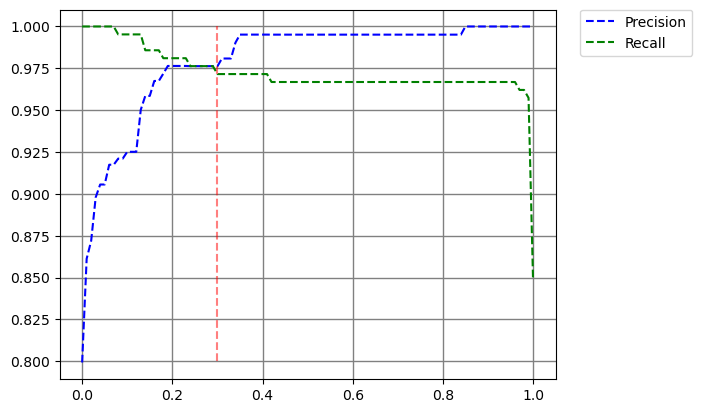

In [34]:
plt.plot(df_scores.threshold, df_scores['p'], "b--", label="Precision")
plt.plot(df_scores.threshold, df_scores['r'], "g--", label="Recall")
plt.vlines(0.3, 0.8, 1, color='r', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()

### Scikit-learn uses different set of thresholds

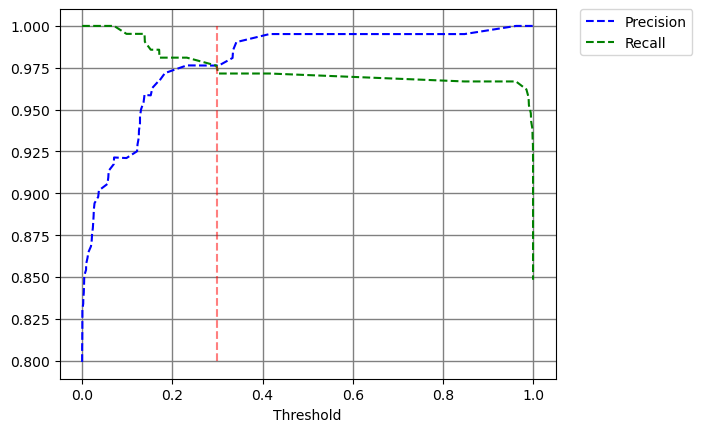

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred)
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.vlines(0.3, 0.8, 1, color='r', linestyle='--', alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

In [36]:
# plt.plot(df_scores['r'], df_scores['p'])

# Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

`F1 = 2 * P * R / (P + R)`

where P is precision and R is recall.

* Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [37]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

In [38]:
# df_scores['f1'] = df_scores['f1']

In [39]:
df_scores[df_scores['f1'] == max(df_scores['f1'])]

,threshold,tp,fp,fn,tn,tpr,fpr,p,r,f1
35,0.35,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.983213
36,0.36,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.983213
37,0.37,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.983213
38,0.38,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.983213
39,0.39,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.983213
40,0.40,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.983213
41,0.41,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.983213


In [40]:
df_scores.iloc[df_scores.f1.argmax()]

threshold      0.350000
tp           205.000000
fp             1.000000
fn             6.000000
tn            52.000000
tpr            0.971564
fpr            0.018868
p              0.995146
r              0.971564
f1             0.983213
Name: 35, dtype: float64

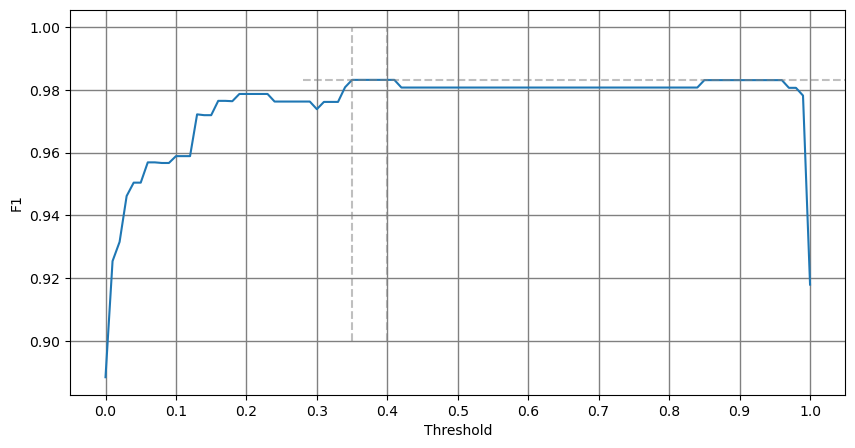

In [41]:
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.35, 0.9, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.4, 0.9, 1, color='grey', linestyle='--', alpha=0.5)
plt.axhline(0.983213, 0.3, 1, color='grey', linestyle='--', alpha=0.5)
plt.xlabel("Threshold")
plt.ylabel("F1")
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

The optimal threshold turns out that is almost half of the maximum F1 score.

# Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

`KFold(n_splits=5, shuffle=True, random_state=1)`

* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

In [42]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[usecols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear',C=C, max_iter=1000, random_state=SEED)
    model.fit(X_train, y_train)
    
    return dv, model

In [43]:
def predict(df, dv, model):
    dicts = df[usecols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    # y_pred = model.predict(X)
    return y_pred

In [44]:
n_splits = 5
C=1.0
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
scores = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)


    auc_score = roc_auc_score(y_val, y_pred)
    scores.append(auc_score)
print('C=%s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1.0, 0.996 +- 0.003


We don't need to execute the above code since Q6 follows and C=1.0 is included, but it was shown for the purpose of the Homework.

# Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

In [45]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[usecols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear',C=C, max_iter=1000, random_state=SEED)
    model.fit(X_train, y_train)
    
    return dv, model

In [46]:
def predict(df, dv, model):
    dicts = df[usecols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    #y_pred = model.predict(X)
    return y_pred

In [47]:
from tqdm.auto import tqdm

In [48]:
n_splits = 5

for C in tqdm([0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc_score = roc_auc_score(y_val, y_pred)
        scores.append(auc_score)
    print('C=%s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01, 0.992 +- 0.006
C=0.1, 0.995 +- 0.004
C=1, 0.996 +- 0.003
C=10, 0.996 +- 0.003


In [49]:
# C=1.0
# dv, model = train(df_train_full, df_train_full.card.values, C=C)
# y_pred = predict(df_test, dv, model)

# auc_score = roc_auc_score(y_test, y_pred)
# auc_score
# print('C=%s %.4f +- %.4f' % (C, np.mean(auc_score), np.std(auc_score)))

In [50]:
#print(classification_report(y_val,y_pred))

In [51]:
# precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# plt.plot(thresholds, precision[1:], label="Precision",linewidth=5) 
# plt.plot(thresholds, recall[1:], label="Recall",linewidth=5) 
# plt.title('Precision and recall for different threshold values') 
# plt.xlabel('Threshold') 
# plt.ylabel('Precision/Recall')
# plt.vlines(0.3, 0.95, 1, color='grey', linestyle='--', alpha=0.5)
# plt.legend() 
# plt.show()